# Glass Prediction

To predict types of glass
1. Gradient Classifier
2. Decision Tree Classifier
3. KNeighbors Classifier
4. GaussianNB (Naive Bayes)
5. BernoulliNB (Naive Bayes)

## Load Data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils.multiclass import unique_labels
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB

from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn import tree


In [2]:
gl_df=pd.read_csv('../../data/glass.csv')

In [3]:
gl_df.head(4)

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [8]:
cols = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'type_of_glass']
gl_df=pd.read_csv('../../data/glass.csv',names=cols)

In [9]:
gl_df.head(4)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1


In [10]:
gl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  type_of_glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


## Examine and visualize the data

In [12]:
gl_df.drop(columns=['Id'],inplace=True)

In [13]:
gl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             214 non-null    float64
 1   Na             214 non-null    float64
 2   Mg             214 non-null    float64
 3   Al             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ca             214 non-null    float64
 7   Ba             214 non-null    float64
 8   Fe             214 non-null    float64
 9   type_of_glass  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


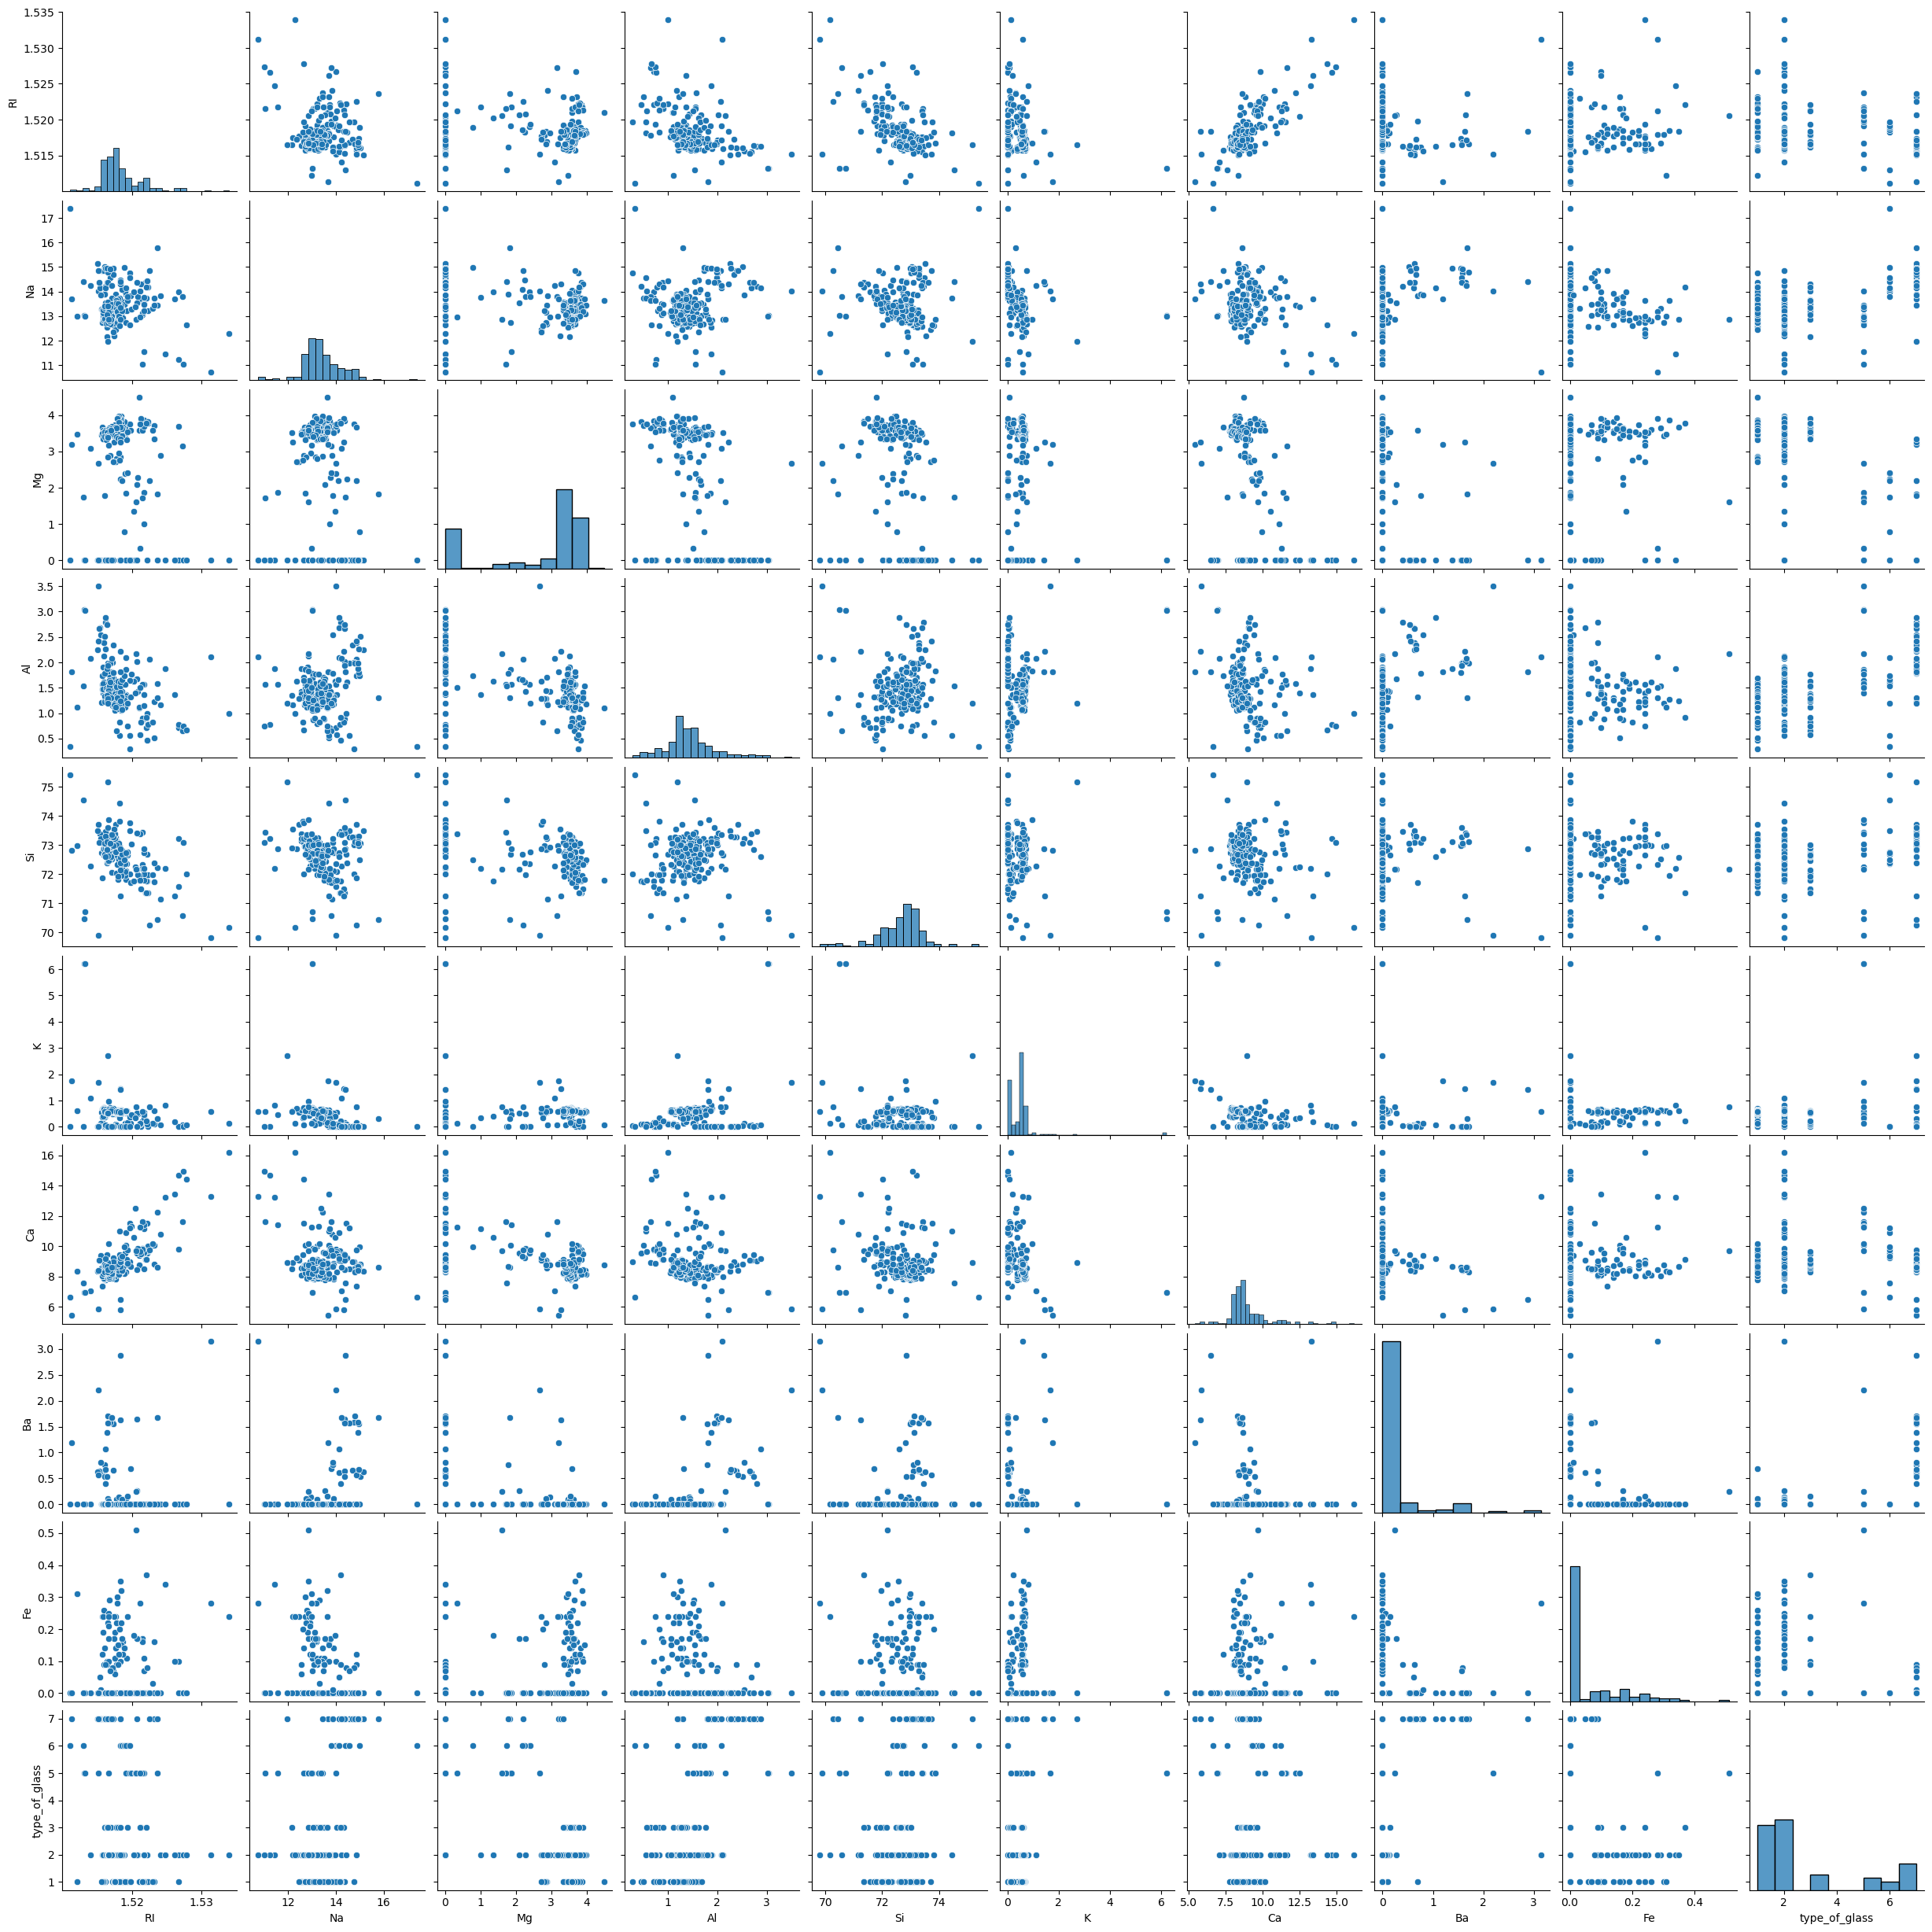

In [14]:
sns.pairplot(gl_df)

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type_of_glass', ylabel='count'>

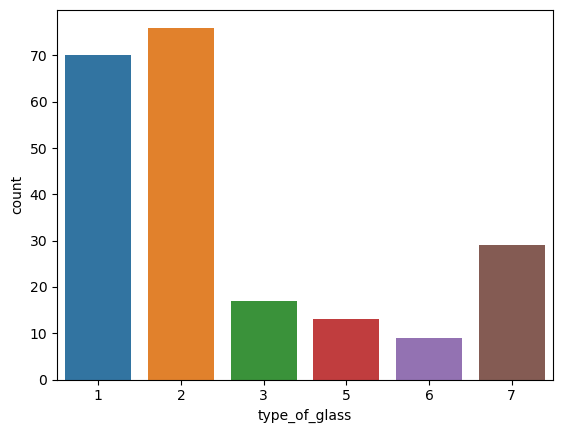

In [15]:
sns.countplot(gl_df['type_of_glass'])

In [18]:
gl_df['type_of_glass'].value_counts(ascending=True)

6     9
5    13
3    17
7    29
1    70
2    76
Name: type_of_glass, dtype: int64

<AxesSubplot:>

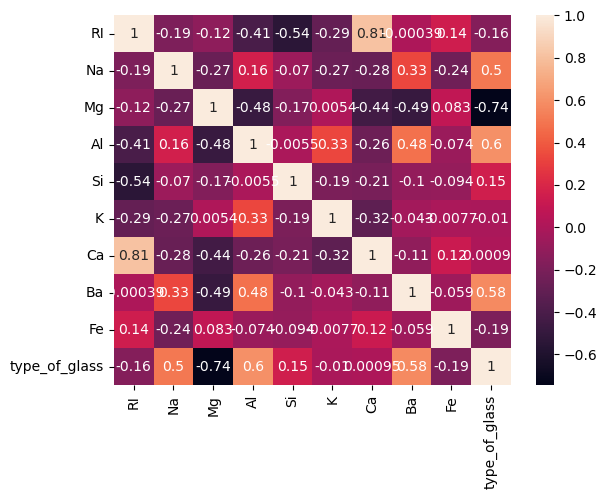

In [20]:
sns.heatmap(gl_df.corr(),annot=True)

# Model Building

## Features Scaling

In [21]:
X=gl_df.drop(columns=['type_of_glass'])
y=pd.DataFrame({'type_of_glass':gl_df['type_of_glass']})


In [23]:
scalar=StandardScaler()
scaled_df=scalar.fit_transform(X)
X=pd.DataFrame(scaled_df,columns=X.columns)

In [24]:
X.head(4)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451


## SGDClassifier

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 11)
sgd=SGDClassifier(shuffle = False)
sgd.fit(X_train,y_train.to_numpy().ravel())
print ('Intercept : ', sgd.intercept_)
print ('Coef : ', sgd.coef_)
print ('Accuracy for training data: ', sgd.score (X_train, y_train))
print ('Accuracy for test data: ', sgd.score (X_test, y_test))

Intercept :  [-10.51579188  -7.73955874 -11.75672602 -74.84224531 -65.22434938
 -46.22533745]
Coef :  [[ 3.17098169e+00 -3.43708008e+00  1.84606353e+01  4.94297643e-01
   3.38499386e+00  9.47758470e-01  7.81814616e+00  1.18271978e+00
  -1.79785837e+00]
 [-6.67765293e-01 -1.16557220e+01 -8.85503785e+00  1.31024434e+00
  -2.49150849e+00 -1.15097207e+01 -1.15719139e+01 -1.88795402e+01
   3.35680393e-01]
 [-9.51185033e+00 -5.02158183e+00  2.43095793e+00 -8.90478484e+00
  -6.08651745e+00 -5.31246659e+00 -1.03039166e+00 -5.47666892e+00
  -1.15220412e+00]
 [-3.13729597e+01 -1.72173143e+01 -1.00472003e+01  2.07928103e+01
  -2.69796255e+01  1.36330792e+01  2.17989508e+01 -1.78423021e+01
  -5.37503045e+00]
 [ 1.12735078e-02  1.68702359e+01  4.76351463e+00  5.83909564e+00
   2.23649566e+00 -3.21801309e+01  1.37295621e+01 -4.37598223e+01
  -2.09362372e+01]
 [ 3.60315071e+01  6.77765353e+00 -8.50293363e-02  2.99776451e+01
   3.19700359e+01 -6.32518948e-01 -1.23621420e+01  1.20592958e+01
  -2.373774

In [27]:
prediction=sgd.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[10  9  1  0  0  0]
 [ 1  6  0  0  2  0]
 [ 0  2  3  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  5]]
              precision    recall  f1-score   support

           1       0.91      0.50      0.65        20
           2       0.32      0.67      0.43         9
           3       0.75      0.60      0.67         5
           5       0.00      0.00      0.00         2
           6       0.50      1.00      0.67         2
           7       1.00      1.00      1.00         5

    accuracy                           0.60        43
   macro avg       0.58      0.63      0.57        43
weighted avg       0.72      0.60      0.61        43



/home/daniel/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/daniel/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/daniel/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## DecisionTreeClassifier

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 11)
dtc = DecisionTreeClassifier (max_depth = 5, min_samples_leaf = 5)
dtc.fit (X_train, y_train.to_numpy().ravel())
print ('Accuracy for training data: ', dtc.score (X_train, y_train))
print ('Accuracy for test data: ', dtc.score (X_test, y_test))

Accuracy for training data:  0.7777777777777778
Accuracy for test data:  0.7209302325581395


In [37]:
prediction=dtc.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[17  2  0  0  1  0]
 [ 3  6  0  0  0  0]
 [ 2  2  1  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  0  5]]
              precision    recall  f1-score   support

           1       0.77      0.85      0.81        20
           2       0.50      0.67      0.57         9
           3       1.00      0.20      0.33         5
           5       1.00      1.00      1.00         2
           6       0.00      0.00      0.00         2
           7       1.00      1.00      1.00         5

    accuracy                           0.72        43
   macro avg       0.71      0.62      0.62        43
weighted avg       0.74      0.72      0.70        43



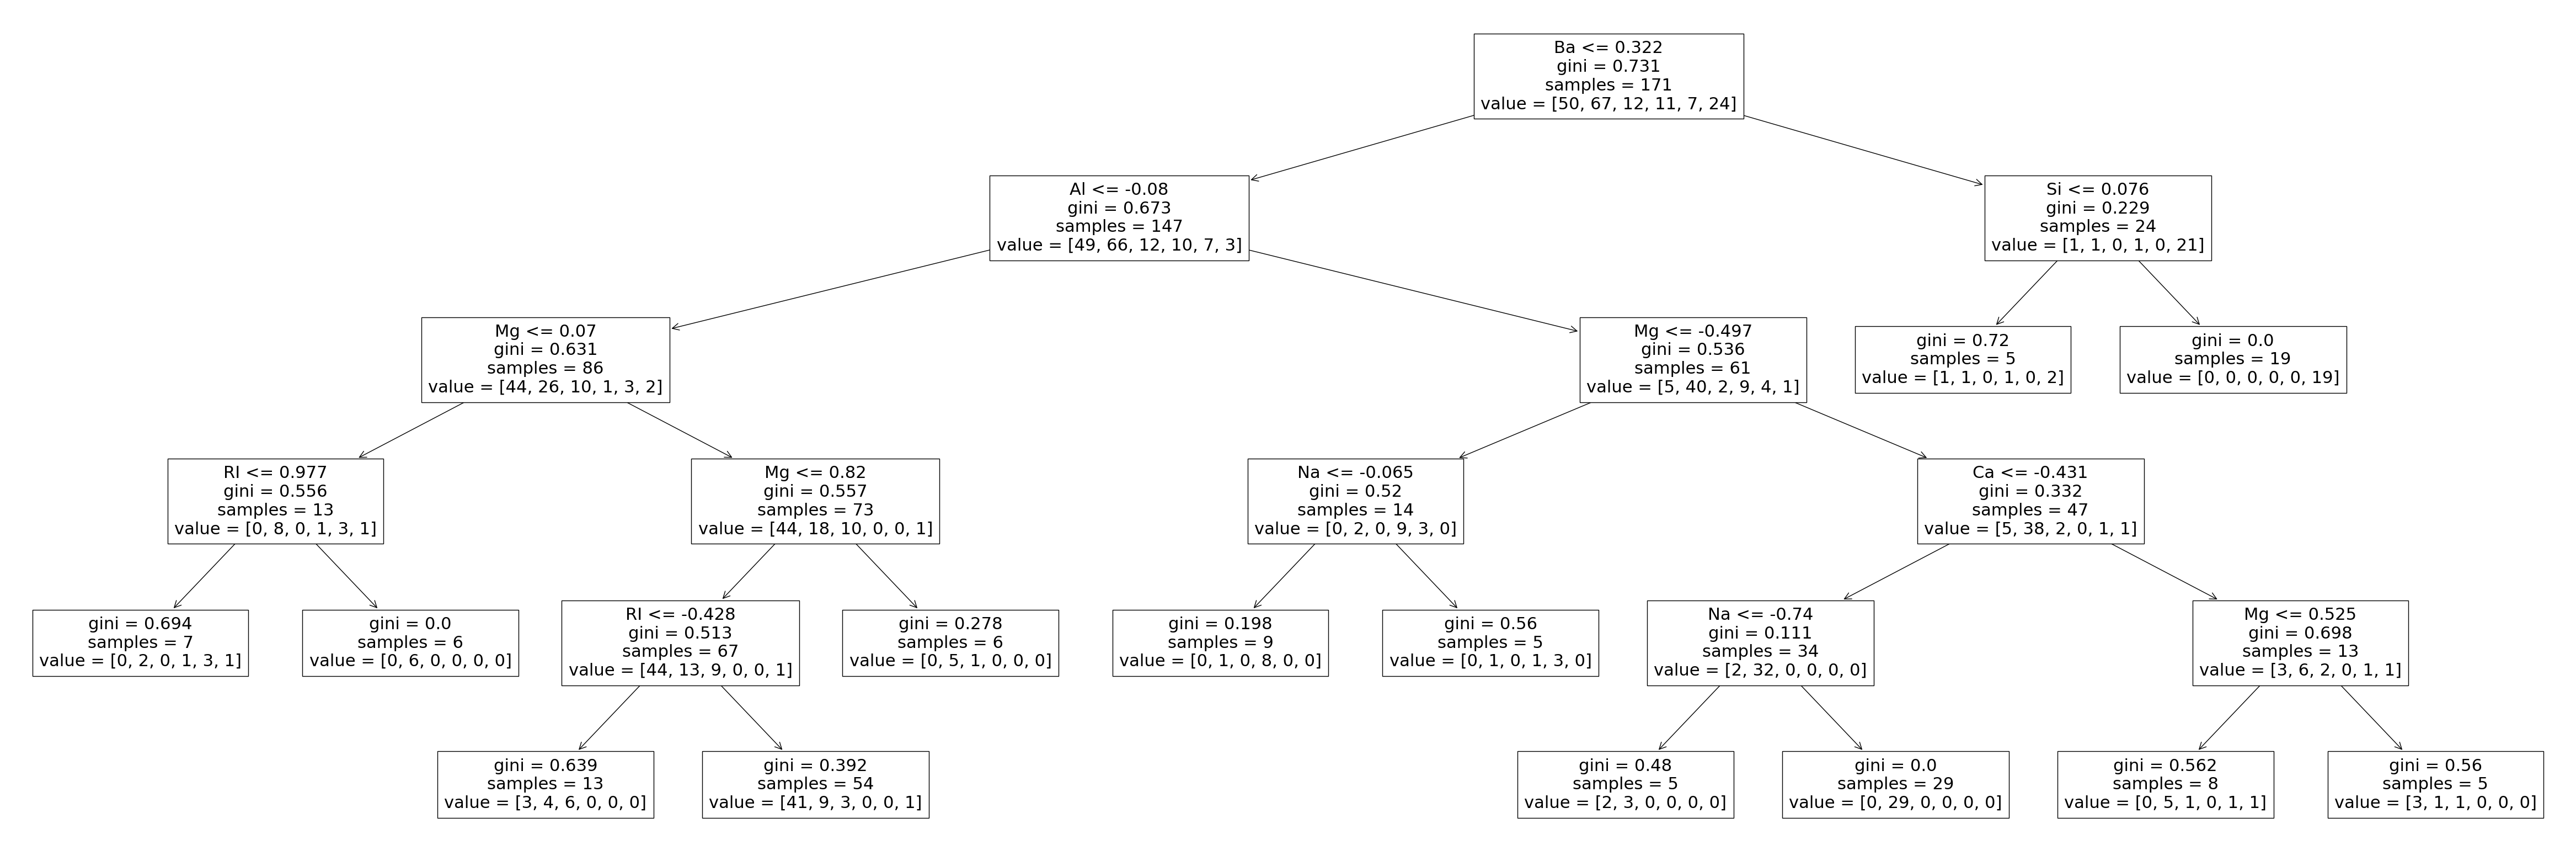

In [38]:
plt.figure(figsize=(60,20))  # customize according to the size of your tree
_ = tree.plot_tree(dtc,  feature_names = X_train.columns.tolist())
plt.show()

## KNeighborsClassifier

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 11)
knn = KNeighborsClassifier (n_neighbors = 11)
knn.fit (X_train, y_train.to_numpy().ravel())
print ('Accuracy for training data: ', knn.score (X_train, y_train))
print ('Accuracy for test data: ', knn.score (X_test, y_test))

Accuracy for training data:  0.7426900584795322
Accuracy for test data:  0.5581395348837209


In [32]:
predictions = knn.predict (X_train)
print(confusion_matrix (y_train, predictions))
print (classification_report (y_train, predictions))

[[44  5  1  0  0  0]
 [11 54  0  1  1  0]
 [ 6  5  1  0  0  0]
 [ 1  3  0  6  0  1]
 [ 2  1  0  1  2  1]
 [ 3  1  0  0  0 20]]
              precision    recall  f1-score   support

           1       0.66      0.88      0.75        50
           2       0.78      0.81      0.79        67
           3       0.50      0.08      0.14        12
           5       0.75      0.55      0.63        11
           6       0.67      0.29      0.40         7
           7       0.91      0.83      0.87        24

    accuracy                           0.74       171
   macro avg       0.71      0.57      0.60       171
weighted avg       0.74      0.74      0.72       171



## Gaussian Naive Bayes

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 11)
gnb = GaussianNB()
gnb.fit (X_train, y_train.to_numpy().ravel())
print ('Accuracy for training data: ', gnb.score (X_train, y_train))
print ('Accuracy for test data: ', gnb.score (X_test, y_test))

Accuracy for training data:  0.4853801169590643
Accuracy for test data:  0.627906976744186


In [40]:
predictions = gnb.predict (X_train)
print(confusion_matrix (y_train, predictions))
print (classification_report (y_train, predictions))

[[32  3 15  0  0  0]
 [38 10 12  3  3  1]
 [ 2  0  9  0  1  0]
 [ 0  6  0  4  0  1]
 [ 0  0  0  0  7  0]
 [ 1  0  0  2  0 21]]
              precision    recall  f1-score   support

           1       0.44      0.64      0.52        50
           2       0.53      0.15      0.23        67
           3       0.25      0.75      0.38        12
           5       0.44      0.36      0.40        11
           6       0.64      1.00      0.78         7
           7       0.91      0.88      0.89        24

    accuracy                           0.49       171
   macro avg       0.53      0.63      0.53       171
weighted avg       0.53      0.49      0.45       171



## Bernoulli Naive Bayes

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 11)
bnb = BernoulliNB()
bnb.fit (X_train, y_train.to_numpy().ravel())
print ('Accuracy for training data: ', bnb.score (X_train, y_train))
print ('Accuracy for test data: ', bnb.score (X_test, y_test))

Accuracy for training data:  0.6608187134502924
Accuracy for test data:  0.7209302325581395


In [43]:
predictions = bnb.predict (X_train)
print(confusion_matrix (y_train, predictions))
print (classification_report (y_train, predictions))

[[46  4  0  0  0  0]
 [22 34  0  4  7  0]
 [10  2  0  0  0  0]
 [ 0  2  0  7  1  1]
 [ 0  0  0  0  5  2]
 [ 1  1  0  1  0 21]]
              precision    recall  f1-score   support

           1       0.58      0.92      0.71        50
           2       0.79      0.51      0.62        67
           3       0.00      0.00      0.00        12
           5       0.58      0.64      0.61        11
           6       0.38      0.71      0.50         7
           7       0.88      0.88      0.88        24

    accuracy                           0.66       171
   macro avg       0.54      0.61      0.55       171
weighted avg       0.66      0.66      0.63       171



/home/daniel/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/daniel/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/daniel/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
